# Testing Environment for Homework 1

In [2]:
# Global setup
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## 1. Implement Gradient Descent

1) Implement a basic gradient descent procedure to minimize scalar functions of a vector argument. Write it generically, so that you can easily specify the objective function and the function to compute the gradient. You should be able to specify the initial guess, the step size and the convergence criterion (a threshold such that the algorithm terminates when the difference in objective function value on two successive steps is below this threshold).

In [3]:
from gradient_descent import GradientDescent, quad, quadGrad

gd = GradientDescent(quad, quadGrad)

gd.stepSize = 1e-2
gd.tol = 1e-6
x_0 = np.array([1.0, 1.0])
print gd.computeMin(x_0,useGradientCriterion=True)


 
--- Minimization Summary --- 
x_min is = [  4.91528181e-07   4.91528181e-07]
f_min is = 4.83199906383e-13
achieved tolerance = 9.83056362965e-07
numFunctionCalls = 720
---------------------------- 
 
(array([  4.91528181e-07,   4.91528181e-07]), 4.8319990638341978e-13, 720, 1e-06)


In [4]:
x_0 = np.array([1.0, 1.0])
print GradientDescent.minimize(quad, x_0, grad=quadGrad)

 
--- Minimization Summary --- 
x_min is = [ 0.03425742  0.03425742]
f_min is = 0.00234714152513
achieved tolerance = -9.67792632187e-05
numFunctionCalls = 168
---------------------------- 
 
(array([ 0.03425742,  0.03425742]), 0.0023471415251319705, 168, 0.0001)


 
--- Minimization Summary --- 
x_min is = [  4.91528181e-07   4.91528181e-07]
f_min is = 4.83199906383e-13
achieved tolerance = 9.83056362965e-07
numFunctionCalls = 720
---------------------------- 
 


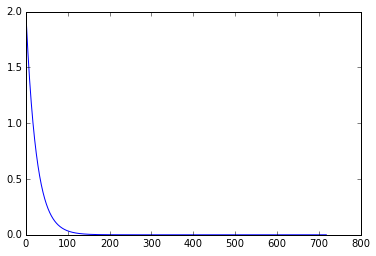

In [5]:
gd = GradientDescent(quad, quadGrad)
gd.tol = 1e-6

gd.computeMin(x_0, useGradientCriterion=True, storeIterValues=True)
gd.plotIterValues()



##### Testing GradientDescent class

Plot default function stored as instance variable

<function quad at 0x112a3b410>
<function quadGrad at 0x112a3b848>
4
2
(21,)
(21,)
Function in blue, derivative in red


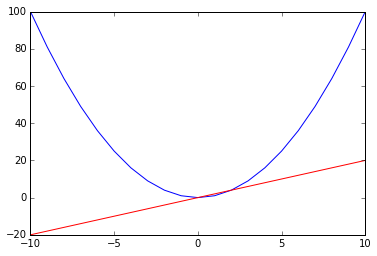

In [6]:
gd = GradientDescent(quad, quadGrad)

# Test functions are there
print gd.f
print gd.grad

# Test values for functions
print gd.f(2)
print gd.grad(1)

# Plot functions and overlay gradient
xaxis = np.linspace(-10,10,21)
yaxis_f = np.linspace(0,0,21)
yaxis_grad = np.linspace(0,0,21)

# Wish I could vectorize but this does not work
# yaxis_f = gd.f(xaxis)
# yaxis_grad = gd.grad(xaxis)

for i in range(len(xaxis)):
    yaxis_f[i] = gd.f(xaxis[i])
    yaxis_grad[i] = gd.grad(xaxis[i])
    
print xaxis.shape
print yaxis_f.shape

print 'Function in blue, derivative in red'
plt.plot(xaxis,yaxis_f, color ='blue')
plt.plot(xaxis,yaxis_grad, color='red')
plt.show()


2) Test your gradient descent procedure on some functions whose optimal value you know, e.g. a quadratic bowl or (the negative of) a Gaussian probability density function. Make sure that you try functions of more than one variable and that you try at least one convex function and one very non-convex function with multiple minima. Discuss the effect of the choice of starting guess, the step size, and the convergence criterion on the resulting solution.


Try one convex function, such as the negative of a Gaussian probability function.

 
--- Minimization Summary --- 
x_min is = [ 0.00044919]
f_min is = [-0.39894224]
achieved tolerance = 0.000179199707678
numFunctionCalls = 10001
---------------------------- 
 


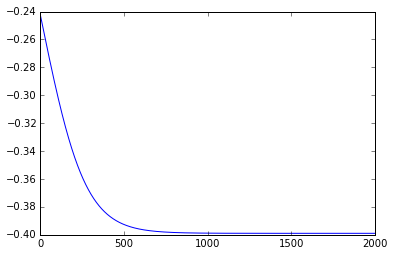

In [7]:
def negGaussian(x, mu=0, sig=1):
    return -1 * (1/(sig * np.sqrt(2*np.pi))) * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

gd = GradientDescent(negGaussian)
x_0 = np.array([1.0])

gd.tol = 1e-6
gd.computeMin(x_0,useGradientCriterion=True,maxFunctionCalls=10000,storeIterValues=True)
gd.plotIterValues()




Try one very non-convex function

 
--- Minimization Summary --- 
x_min is = [ 0.70710703]
f_min is = [-0.25]
achieved tolerance = 9.76134314046e-07
numFunctionCalls = 331
---------------------------- 
 


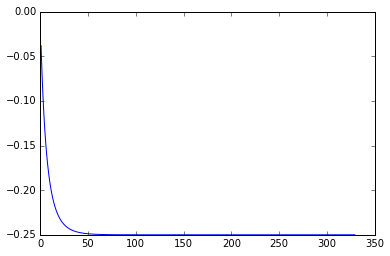

<function f at 0x114d80e60>
<function gradf at 0x114d80b18>
12
2
(21,)
(21,)
Function in blue, derivative in red


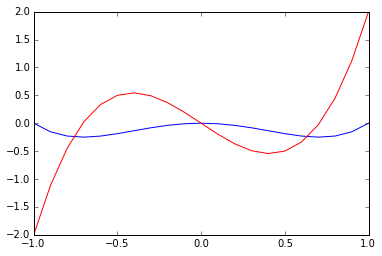

In [8]:
def f(x):
    return x**4 - x**2
def gradf(x):
    return 4*x**3 - 2*x

gd = GradientDescent(f,gradf)
x_0 = np.array([1.0])

gd.tol = 1e-6
gd.computeMin(x_0,useGradientCriterion=True,maxFunctionCalls=10000,storeIterValues=True)
gd.plotIterValues()

# Test functions are there
print gd.f
print gd.grad

# Test values for functions
print gd.f(2)
print gd.grad(1)

# Plot functions and overlay gradient
xaxis = np.linspace(-1,1,21)
yaxis_f = np.linspace(0,0,21)
yaxis_grad = np.linspace(0,0,21)

# Wish I could vectorize but this does not work
# yaxis_f = gd.f(xaxis)
# yaxis_grad = gd.grad(xaxis)

for i in range(len(xaxis)):
    yaxis_f[i] = gd.f(xaxis[i])
    yaxis_grad[i] = gd.grad(xaxis[i])
    
print xaxis.shape
print yaxis_f.shape

print 'Function in blue, derivative in red'
plt.plot(xaxis,yaxis_f, color ='blue')
plt.plot(xaxis,yaxis_grad, color='red')
plt.show()